# Cloud-based LCA
Introductory Walk-through with Antelope and https://vault.lc

In this demo, we are going to start from scratch and download everything we need from a remote server, hosted at sc.vault.lc

In [1]:
from antelope_foreground import ForegroundCatalog
from antelope import enum  # a handy enumerator for interactive use

In [2]:
cat = ForegroundCatalog()

Loading JSON data from /home/b/size/lib/python3.11/site-packages/antelope_core/archives/data/elcd_reference_quantities.json:
local.qdb: /home/b/size/lib/python3.11/site-packages/antelope_core/archives/data/elcd_reference_quantities.json
local.qdb: Setting NSUUID (False) 77833297-6780-49bf-a61a-0cb707dce700
local.qdb: /data/GitHub/lca-tools/lcatools/qdb/data/elcd_reference_quantities.json
28 total quantity entities added (28 new)
6 total flow entities added (6 new)


In [4]:
cat.blackbook_guest('https://sc.vault.lc/')

GET https://sc.vault.lc/auth/guest.. 200 [0.37 sec]
Welcome 'Guest user' to blackbook, courtesy of ANTELOPE_AUTHORITY.
You are accessing from IP 50.224.25.13
Last access: Sun Sep 22 19:58:33 2024 


This shows us a list of everything the blackbook server is offering to guest users

In [5]:
list(cat.blackbook_origins)

GET https://sc.vault.lc/origins.. 200 [0.21 sec]


['lcacommons.fhwa.asphaltframework',
 'lcacommons.useeio.2.0.1',
 'lcacommons.uslci.fy21.q1',
 'lcacommons.uslci.fy22.q3',
 'lcacommons.uslci.fy22.q4.01',
 'lcacommons.uslci.fy23.q4',
 'lcacommons.uslci.fy24.q1.01',
 'lcia.openlca.2.1.4',
 'lcia.traci.2.1']

We now do the following procedure:
1. We obtain *resources*
2. We generate a query against the resources
3. We use the query to ask questions

In [6]:
traci_resources = cat.get_blackbook_resources('lcia.traci.2.1')

GET https://sc.vault.lc/origins/lcia.traci.2.1/resource.. 200 [0.24 sec]


In [7]:
traci_resources

[LcResource(lcia.traci.2.1, dataSource=https://bk.vault.lc/:XdbClient, ['quantity', 'basic', 'index'] [50])]

Now we can look at our catalog's *interfaces* and we see TRACI there

In [8]:
cat.show_interfaces()

lcia.traci.2.1 [basic, index, quantity]
local.qdb [basic, index, quantity]


Here's our query

In [9]:
q_traci = cat.query('lcia.traci.2.1')

QQQQQQQQQQQQQQQQQQ lcia.traci.2.1 QQQQQQQQQQQQQQQQQQ
No PROVIDERS found in antelope_background
Found Antelope providers:
AntelopeMeta:_dev
antelope_core.providers:EcoinventLcia
antelope_core.providers:OpenLcaJsonLdArchive
antelope_core.providers:Traci21Factors
antelope_core.providers:XdbClient
antelope_core.providers:OpenLcaRefData
antelope_foreground.providers:AntelopeV1Client
antelope_foreground.providers:LcForeground
antelope_foreground.providers:OryxClient
GET https://bk.vault.lc/origins.. 200 [0.18 sec]
lcia.traci.2.1: https://bk.vault.lc/
lcia.traci.2.1: Setting NSUUID (False) None
GET https://bk.vault.lc/lcia.traci.2.1/config.. 200 [0.05 sec]
Applying configuration to XdbClient with 0 entities at https://bk.vault.lc/
Applying context hint lcia.traci.2.1:water => to water
Applying context hint lcia.traci.2.1:air => to air


Now, what would we do with a TRACI 2.1 origin?  Get LCIA methods, of course.


In [17]:
qs = enum(q_traci.lcia_methods())

GET https://bk.vault.lc/lcia.traci.2.1/lcia_methods.. 200 [0.05 sec]
 [00] [lcia.traci.2.1] Acidification Air [kg SO2 eq] [TRACI 2.1]
 [01] [lcia.traci.2.1] Ecotoxicity, freshwater [CTUeco] [TRACI 2.1]
 [02] [lcia.traci.2.1] Eutrophication Air [kg N eq] [TRACI 2.1]
 [03] [lcia.traci.2.1] Eutrophication Water [kg N eq] [TRACI 2.1]
 [04] [lcia.traci.2.1] Global Warming Air [kg CO2 eq] [TRACI 2.1]
 [05] [lcia.traci.2.1] Human Health Particulates Air [PM2.5 eq] [TRACI 2.1]
 [06] [lcia.traci.2.1] Human health toxicity, cancer [CTUcancer] [TRACI 2.1]
 [07] [lcia.traci.2.1] Human health toxicity, non-cancer [CTUnoncancer] [TRACI 2.1]
 [08] [lcia.traci.2.1] Ozone Depletion Air [kg CFC-11 eq] [TRACI 2.1]
 [09] [lcia.traci.2.1] Smog Air [kg O3 eq] [TRACI 2.1]


Remember how I said `enum` was handy for interactive use? It basically prints the string form of objects, along with
their index in the list, as opposed to their `repr` form.

Anyway, now we can inspect those objects we got back.

In [18]:
gwp = qs[4]
gwp.show()

QuantityRef catalog reference (Global Warming Air)
origin: lcia.traci.2.1
   UUID: 9304410a-9dfc-3c85-8a30-c548893097c3
   Name: Global Warming Air
Comment: 
referenceUnit: kg CO2 eq
==Local Fields==
       Indicator: kg CO2 eq
  UnitConversion: {'kg CO2 eq': 1.0}
          Method: TRACI 2.1
        Category: Global Warming Air
        Synonyms: []
blackbook_origin: lcia.traci.2.1


In [19]:
_=enum(gwp.factors())

GET https://bk.vault.lc/lcia.traci.2.1/Global Warming Air/factors.. 200 [0.10 sec]
Imported 91 factors for [lcia.traci.2.1] Global Warming Air [kg CO2 eq] [TRACI 2.1]
 [00] 2.28e+04 [GLO] [kg CO2 eq / kg] sulfur hexafluoride: to air (Global Warming Air [kg CO2 eq] [TRACI 2.1])
 [01] 1.77e+04 [GLO] [kg CO2 eq / kg] trifluoromethyl sulfur pentafluoride: to air (Global Warming Air [kg CO2 eq] [TRACI 2.1])
 [02] 1.73e+04 [GLO] [kg CO2 eq / kg] propane, perfluorocyclo-: to air (Global Warming Air [kg CO2 eq] [TRACI 2.1])
 [03] 1.72e+04 [GLO] [kg CO2 eq / kg] nitrogen trifluoride: to air (Global Warming Air [kg CO2 eq] [TRACI 2.1])
 [04] 1.49e+04 [GLO] [kg CO2 eq / kg] hfe-125: to air (Global Warming Air [kg CO2 eq] [TRACI 2.1])
 [05] 1.48e+04 [GLO] [kg CO2 eq / kg] hfc-23: to air (Global Warming Air [kg CO2 eq] [TRACI 2.1])
 [06] 1.44e+04 [GLO] [kg CO2 eq / kg] cfc-13: to air (Global Warming Air [kg CO2 eq] [TRACI 2.1])
 [07] 1.22e+04 [GLO] [kg CO2 eq / kg] pfc-116: to air (Global Warming A

Great! an LCIA method. what can we do with it?

Well, we need some process data

In [20]:
uslci_resources = cat.get_blackbook_resources('lcacommons.uscli.fy24.q1.01')


GET https://sc.vault.lc/origins/lcacommons.uscli.fy24.q1.01/resource.. 403 [0.21 sec]


HTTPError: [Errno 403] b'{"detail":"No active grants (50.224.25.13, lcacommons.uscli.fy24.q1.01)"}'

## lcacommons.uscli.fy24.q1.01
Oops! spelled it wrong


In [21]:
uslci_resources = cat.get_blackbook_resources('lcacommons.uslci.fy24.q1.01')

GET https://sc.vault.lc/origins/lcacommons.uslci.fy24.q1.01/resource.. 200 [0.13 sec]


Make sure it showed up

In [22]:
cat.show_interfaces()

lcacommons.uslci.fy24.q1.01 [background, basic, exchange, index]
lcia.traci.2.1 [basic, index, quantity]
local.qdb [basic, index, quantity]


In [23]:
q_us = cat.query(uslci_resources[0].origin)  # let's not make any more text entry mistakes

QQQQQQQQQQQQQQQQQQ lcacommons.uslci.fy24.q1.01 QQQQQQQQQQQQQQQQQQ
GET https://bk.vault.lc/origins.. 200 [0.17 sec]
lcacommons.uslci.fy24.q1.01: https://bk.vault.lc/
lcacommons.uslci.fy24.q1.01: Setting NSUUID (False) None
GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/config.. 200 [0.05 sec]
Applying configuration to XdbClient with 0 entities at https://bk.vault.lc/


In [25]:
some_flows = enum(q_us.flows(context='Technosphere Flows'))

GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/flows.. 200 [0.11 sec]
 [00] [lcacommons.uslci.fy24.q1.01] Proton exchange water electrolysis stack; 1 MW, at plant [Item(s)]
 [01] [lcacommons.uslci.fy24.q1.01] Ethanol, denatured, switchgrass, biochemical [kg]
 [02] [lcacommons.uslci.fy24.q1.01] Urea, at regional storehouse [kg]
 [03] [lcacommons.uslci.fy24.q1.01] Phenol resorcinol formaldehyde resin, at plant [kg]
 [04] [lcacommons.uslci.fy24.q1.01] Enzyme, Alpha-amylase, Novozyme Liquozyme [kg]
 [05] [lcacommons.uslci.fy24.q1.01] Palm kernel oil, processed, at plant [kg]
 [06] [lcacommons.uslci.fy24.q1.01] Winter wheat straw, production [kg]
 [07] [lcacommons.uslci.fy24.q1.01] Gypsum wallboard product, type X, 0.625 inch (15.875 mm) [m2]
 [08] [lcacommons.uslci.fy24.q1.01] Corn stover, at conversion plant [kg]
 [09] [lcacommons.uslci.fy24.q1.01] High radioactive wastes [kg]
 [10] [lcacommons.uslci.fy24.q1.01] Steel, stainless 304, scrap [kg]
 [11] [lcacommons.uslci.fy24.q1.01] Cop

In [64]:
some_flows[39].show()

FlowRef catalog reference (0a61808a-df04-3ec0-8c2b-93d4f5cf9fbf)
origin: lcacommons.uslci.fy24.q1.01
Context: 3251: Basic Chemical Manufacturing
 Locale: GLO
   UUID: 0a61808a-df04-3ec0-8c2b-93d4f5cf9fbf
   Name: Distillers dried grains with solubles
GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/0a61808a-df04-3ec0-8c2b-93d4f5cf9fbf/doc/Comment.. 200 [0.28 sec]
Comment: 
referenceQuantity: [local.qdb] Mass [kg]
==Local Fields==
            unit: kg
        Synonyms: []
blackbook_origin: lcacommons.uslci.fy24.q1.01
         context: ['Technosphere Flows', '31-33: Manufacturing', '3251: Basic Chemical Manufacturing']
          locale: GLO


In [65]:
my_flow = some_flows[39]

In [66]:
tgts = enum(my_flow.targets())

GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/0a61808a-df04-3ec0-8c2b-93d4f5cf9fbf/targets.. 200 [0.05 sec]
 [00] [lcacommons.uslci.fy24.q1.01] Ethanol, denatured, corn dry mill [Northern America]


In [67]:
tgts[0].show()

ProcessRef catalog reference (8e3e47ea-ed49-329e-8931-29115917bc81)
origin: lcacommons.uslci.fy24.q1.01
   UUID: 8e3e47ea-ed49-329e-8931-29115917bc81
   Name: Ethanol, denatured, corn dry mill
Comment: 
==Local Fields==
     SpatialScope: Northern America
    TemporalScope: {'begin': '2007-12-31', 'end': '2099-12-31'}
 blackbook_origin: lcacommons.uslci.fy24.q1.01
referenceExchange: [ReferenceExchange(origin='lcacommons.uslci.fy24.q1.01', process='8e3e47ea-ed49-329e-8931-29115917bc81', flow=FlowEntity(origin='lcacommons.uslci.fy24.q1.01', entity_id='0a61808a-df04-3ec0-8c2b-93d4f5cf9fbf', entity_type='flow', properties={'name': 'Distillers dried grains with solubles', 'referenceQuantity': '93a60a56-a3c8-11da-a746-0800200b9a66', 'unit': 'kg', 'Synonyms': []}, context=['Technosphere Flows', '31-33: Manufacturing', '3251: Basic Chemical Manufacturing'], locale='GLO'), direction='Output', termination=None, context=None, type='reference', comment='', is_reference=True), ReferenceExchange(ori

In [68]:
p = tgts[0]

In [69]:
res = p.bg_lcia(gwp)

GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/8e3e47ea-ed49-329e-8931-29115917bc81/lcia/Global Warming Air.. 400 [0.21 sec]


HTTPError: [Errno 400] b'{"detail":"Process [lcacommons.uslci.fy24.q1.01] Ethanol, denatured, corn dry mill [Northern America] has multiple references"}'

In [70]:
res = p.bg_lcia(gwp, ref_flow=my_flow)

GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/8e3e47ea-ed49-329e-8931-29115917bc81/0a61808a-df04-3ec0-8c2b-93d4f5cf9fbf/lcia/Global Warming Air.. 200 [0.43 sec]


In [71]:
res.total()

2.5448151182130765

In [72]:
res.show_components()

[lcia.traci.2.1] Global Warming Air [kg CO2 eq] [TRACI 2.1] kg CO2 eq
------------------------------------------------------------
A      2.54  [lcacommons.uslci.fy24.q1.01] Ethanol, denatured, corn dry mill [Northern America]
      2.54 [lcia.traci.2.1] Global Warming Air [kg CO2 eq] [TRACI 2.1]


In [73]:
res.show_details()

[lcia.traci.2.1] Global Warming Air [kg CO2 eq] [TRACI 2.1] kg CO2 eq
------------------------------------------------------------

[lcacommons.uslci.fy24.q1.01] Ethanol, denatured, corn dry mill [Northern America]:
       2.53 =          1  x       2.53 [GLO] carbon dioxide, to air
     0.0401 =        298  x   0.000134 [GLO] nitrous oxide, None
     0.0383 =        298  x   0.000128 [GLO] nitrous oxide, to air
   5.81e-05 =          1  x   5.81e-05 [GLO] carbon dioxide, None
   5.35e-05 =          1  x   5.35e-05 [GLO] carbon dioxide, None
   4.03e-05 =    1.4e+03  x   2.88e-08 [GLO] carbon tetrachloride, to air
   1.37e-05 =         25  x   5.46e-07 [GLO] methane, None
   3.71e-06 =   1.43e+03  x   2.59e-09 [GLO] hfc-134a, to air
   1.42e-06 =        8.7  x   1.64e-07 [GLO] methylenechloride, to air
   8.09e-07 =   1.81e+03  x   4.47e-10 [GLO] hcfc-22, to air
    6.5e-07 =         25  x    2.6e-08 [GLO] methane, None
   2.79e-07 =        298  x   9.35e-10 [GLO] nitrous oxide, None
 

## Let's take a closer look at our process

In [74]:
len(p.inventory())

GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/8e3e47ea-ed49-329e-8931-29115917bc81/inventory.. 200 [0.36 sec]
GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/contexts/subterranean.. 200 [0.16 sec]
lcacommons.uslci.fy24.q1.01/b6f010fb-a764-3063-af2d-bcb8309a97b7 ***** CO2


29

In [75]:
deps = enum(p.dependencies(ref_flow=my_flow))

GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/8e3e47ea-ed49-329e-8931-29115917bc81/0a61808a-df04-3ec0-8c2b-93d4f5cf9fbf/dependencies.. 200 [0.23 sec]
 [00] [ Ethanol, denatured, corn dry mill [Northern America] ] <--# 3.09 (kg) Corn grain, at conversion plant 
 [01] [ Ethanol, denatured, corn dry mill [Northern America] ] <--# 0.0146 (m3) Natural gas, combusted in industrial boiler 
 [02] [ Ethanol, denatured, corn dry mill [Northern America] ] <--# 0.0277 (kg) Lignite coal, combusted in industrial boiler 
 [03] [ Ethanol, denatured, corn dry mill [Northern America] ] <--# 0.0154 (kg) Sodium hydroxide, production mix, at plant 
 [04] [ Ethanol, denatured, corn dry mill [Northern America] ] <--# 1.77e-05 (m3) Gasoline, at refinery 
 [05] [ Ethanol, denatured, corn dry mill [Northern America] ] <--# 0.00953 (MJ) Electricity, at grid 
 [06] [ Ethanol, denatured, corn dry mill [Northern America] ] <--# 0.303 (kg) Soy meal, at plant 
 [07] [ Ethanol, denatured, corn dry mill [Northern

In [76]:
_=enum(p.cutoffs(my_flow))

GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/8e3e47ea-ed49-329e-8931-29115917bc81/0a61808a-df04-3ec0-8c2b-93d4f5cf9fbf/cutoffs.. 200 [0.21 sec]
 [00] [ Ethanol, denatured, corn dry mill [Northern America] ] <--  4.79e-10 (Item(s)) Ethanol fermentation plant  (cutoff)
 [01] [ Ethanol, denatured, corn dry mill [Northern America] ] <--  19.9 (MJ) Energy, output  (cutoff)
 [02] [ Ethanol, denatured, corn dry mill [Northern America] ] <--  0.0092 (kg) Disposal, inert waste, 5% water, to inert material landfill  (cutoff)
 [03] [ Ethanol, denatured, corn dry mill [Northern America] ] <--  6.67e-06 (m3) Treatment,maize starch production effluent,to wastewater treatment,class2  (cutoff)
 [04] [ Ethanol, denatured, corn dry mill [Northern America] ] <--  0.83 (MJ) Heat, at cogen with ignition biogas engine, allocation exergy  (cutoff)
 [05] [ Ethanol, denatured, corn dry mill [Northern America] ] <--  0.004 (kg) Yeast paste, from whey, at fermentation  (cutoff)


# Contribution Analysis

To do a contribution analysis we will make a foreground model of our process.

But first, we need to create a foreground

In [44]:
fg = cat.create_foreground('tester')

QQQQQQQQQQQQQQQQQQ tester QQQQQQQQQQQQQQQQQQ
tester: tester
tester: Setting NSUUID (None) None
Loading tester
0 total fragment entities added (0 new)


In [77]:
model = fg.create_process_model(p, ref_flow=my_flow)

GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/8e3e47ea-ed49-329e-8931-29115917bc81/exchanges/0a61808a-df04-3ec0-8c2b-93d4f5cf9fbf.. 200 [0.14 sec]


In [78]:
model.show()

( ** ref) -<- d398c -<- -O    [15000 kg] Distillers dried grains with solubles 
LcFragment Entity (ref d398c773-6b52-451a-9620-4ed4e625ee08)
origin: tester
reference: None
     Name: Distillers dried grains with solubles
  Comment: 
StageName: 
Exchange values: 
              Cached: 15000
            Observed: 15000

Balance flow: False
Terminations: 
            Scenario  Termination
                None: -O   Foreground


In [79]:
model.show_tree()

   -<--O   d398c [ 1.5e+04 kg] Distillers dried grains with solubles
    [   1 unit] Distillers dried grains with solubles
       |        Stage: Ethanol, denatured, corn dry mill
       | -<--B*  1c9bf (=      1 kg) Distillers dried grains with solubles
       x 


In [80]:
_=enum(model.cutoffs())

 [00] [ Distillers dried grains with solubles ]*==>  1.5e+04 (kg) Distillers dried grains with solubles 


In [81]:
model.fragment_lcia(gwp).total()

GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/8e3e47ea-ed49-329e-8931-29115917bc81/0a61808a-df04-3ec0-8c2b-93d4f5cf9fbf/lcia/Global Warming Air.. 200 [0.12 sec]


38172.22677319615

In [82]:
model.cached_ev

15000.0

In [83]:
model.fragment_lcia(gwp).total() / model.cached_ev

2.5448151182130765

In [84]:
res.total()

2.5448151182130765

### they match

In [85]:
fg.extend_process(model)

GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/8e3e47ea-ed49-329e-8931-29115917bc81/0a61808a-df04-3ec0-8c2b-93d4f5cf9fbf/inventory.. 200 [0.17 sec]
GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/c7fec37a-a023-3563-84d6-fa33a6b19f2f.. 200 [0.06 sec]
GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/contexts/3112: Grain and Oilseed Milling.. 200 [0.05 sec]
GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/9109d57c-8234-3569-a2e6-0e4671b524d9.. 200 [0.05 sec]
GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/contexts/4842: Specialized Freight Trucking.. 200 [0.05 sec]
GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/1b6afe73-a064-33a3-87b0-265ae10851e9.. 200 [0.05 sec]
GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/3455f918-4a43-3b09-b06e-7402c12b8d45.. 200 [0.05 sec]
GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/1b0f75b8-e749-3eb2-8727-de6a22f60646.. 200 [0.05 sec]
GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/0aaf1e13-5d80-37f9-b7bb-81a6b8965c71.. 200

In [86]:
model.show_tree()

   -<--O   d398c [ 1.5e+04 kg] Distillers dried grains with solubles
    [   1 unit] Distillers dried grains with solubles
       |        Stage: Ethanol, denatured, corn dry mill
       | -<--*   1c9bf (=      1 kg) Distillers dried grains with solubles
       |  [   1 kg] Distillers dried grains with solubles
       |     |        Stage: CUTOFF Flows
       |     | -<----: 5f556 [   0.004 kg] Yeast paste, from whey, at fermentation
       |     | -<----: 12c39 [ 4.79e-10 Item(s)] Ethanol fermentation plant
       |     | -<----: cf1ce [    0.83 MJ] Heat, at cogen with ignition biogas engine, allocation exergy
       |     | -<----: 082e2 [  0.0092 kg] Disposal, inert waste, 5% water, to inert material landfill
       |     | -<----: 52ac1 [    19.9 MJ] Energy, output
       |     | -<----: 3f761 [ 6.67e-06 m3] Treatment,maize starch production effluent,to wastewater treatment,class2
       |     |        Stage: Chlorine, production mix, at plant
       |     | -<--B*  f1739 [  0.0154

In [87]:
model.fragment_lcia(gwp).show_components()

POST https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/8e3e47ea-ed49-329e-8931-29115917bc81/0a61808a-df04-3ec0-8c2b-93d4f5cf9fbf/lcia/Global Warming Air.. 200 [0.66 sec]
GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/759a9b22-1de5-49fe-ac1d-0c287b2ef93e/ea8515c5-e3d4-4f42-a856-67a9b85b30a0/lcia/Global Warming Air.. 200 [0.13 sec]
GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/c7fec37a-a023-3563-84d6-fa33a6b19f2f/d6bfc1d8-069b-3604-9685-9ed45c6dfce4/lcia/Global Warming Air.. 200 [0.22 sec]
GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/9109d57c-8234-3569-a2e6-0e4671b524d9/2766f5e7-9d42-36cb-8a03-11aa4f7ecd3a/lcia/Global Warming Air.. 200 [0.40 sec]
GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/1b6afe73-a064-33a3-87b0-265ae10851e9/f867896e-830f-31f9-975d-465b212262ef/lcia/Global Warming Air.. 200 [0.45 sec]
GET https://bk.vault.lc/lcacommons.uslci.fy24.q1.01/faa85914-ec68-377e-aee5-0e0af4e27fc8/bf2b1e5a-4c92-3974-a2fd-a68898833086/lcia/Global Warming Air.. 200 [0.43 se

HTTPError: [Errno 403] b'"Quota Exceeded: iface: exchange, attr: exchange_values"'

### Quota exceeded!
Well, there's an easy remedy for that-- go to https://vault.lc and sign up!

or wait for the hour to roll over

#### But!
we don't need the web to do visualization

In [90]:
from antelope_reports.charts.model_graph import ModelGraph

In [91]:
mg = ModelGraph(model)

In [93]:
%matplotlib inline

In [96]:
from IPython.display import Image, display

def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

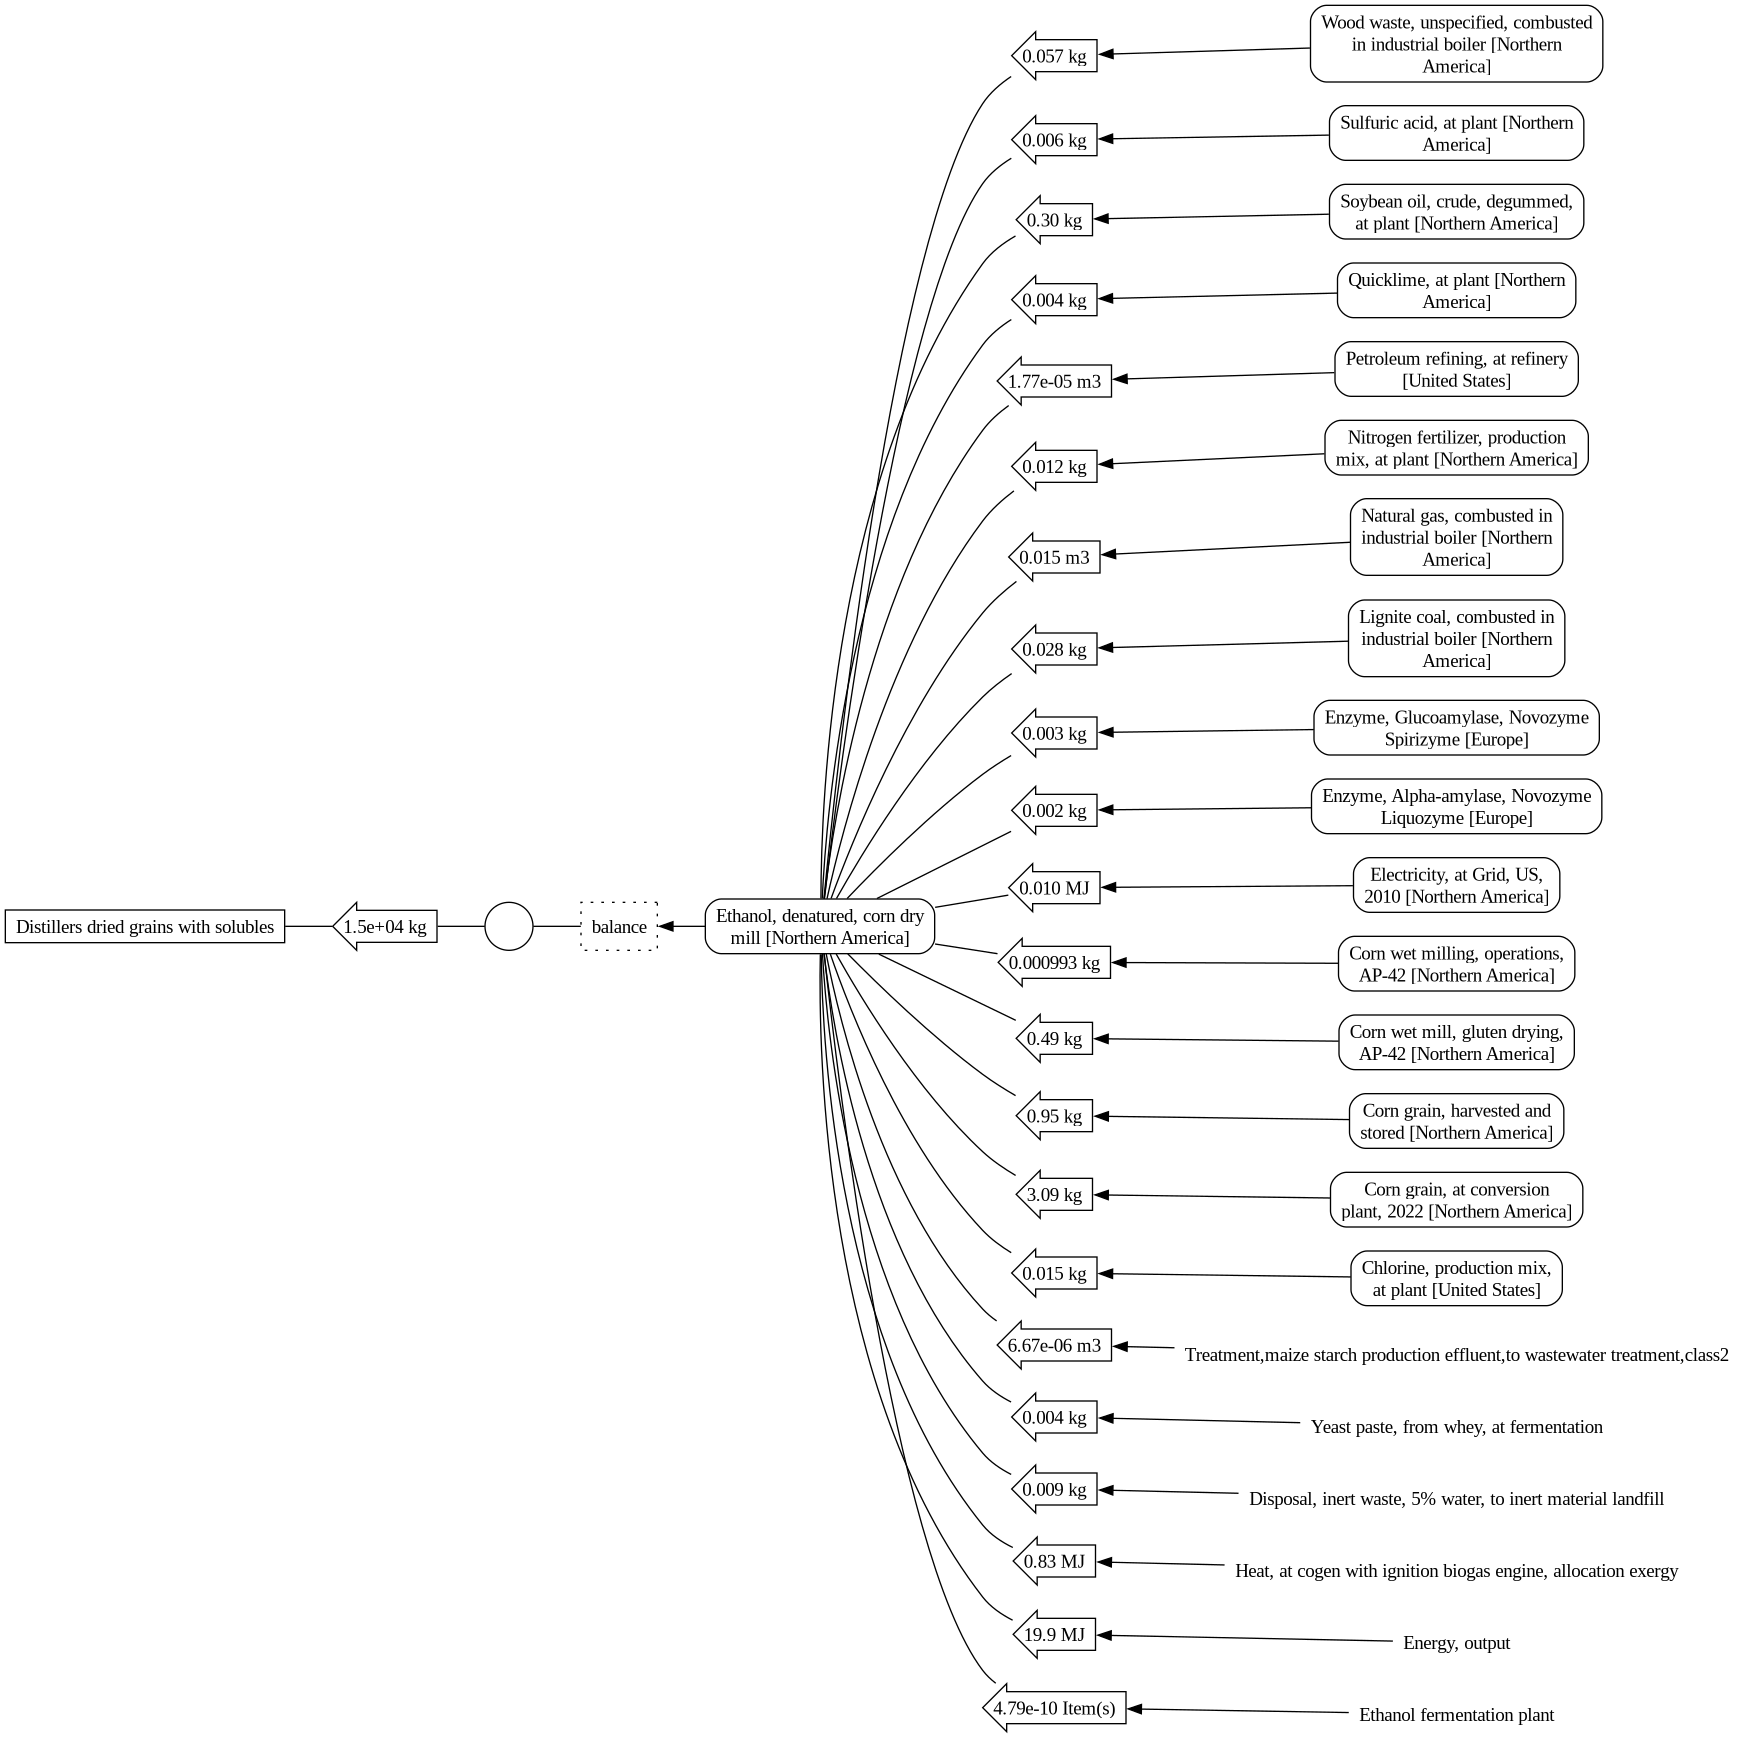

In [97]:
view_pydot(mg._graph)

In [98]:
model.show_tree()

   -<--O   d398c [ 1.5e+04 kg] Distillers dried grains with solubles
    [   1 unit] Distillers dried grains with solubles
       |        Stage: Ethanol, denatured, corn dry mill
       | -<--*   1c9bf (=      1 kg) Distillers dried grains with solubles
       |  [   1 kg] Distillers dried grains with solubles
       |     |        Stage: CUTOFF Flows
       |     | -<----: 5f556 [   0.004 kg] Yeast paste, from whey, at fermentation
       |     | -<----: 12c39 [ 4.79e-10 Item(s)] Ethanol fermentation plant
       |     | -<----: cf1ce [    0.83 MJ] Heat, at cogen with ignition biogas engine, allocation exergy
       |     | -<----: 082e2 [  0.0092 kg] Disposal, inert waste, 5% water, to inert material landfill
       |     | -<----: 52ac1 [    19.9 MJ] Energy, output
       |     | -<----: 3f761 [ 6.67e-06 m3] Treatment,maize starch production effluent,to wastewater treatment,class2
       |     |        Stage: Chlorine, production mix, at plant
       |     | -<--B*  f1739 [  0.0154